# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

# The following cell shows the program training a decision tree and its results in preciction 

In [2]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy, cv=5 fa 5 fold per  cross validatiom
print(scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]


# The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [3]:
from sklearn import neighbors
n_neighbors = 11 # il k del k nearest neighbours
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform') # metto i pesi uniformi
clf_knn = clf_knn.fit(iris.data, iris.target) #fitting dei dati nel classificatore
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores) # sul primo fold (il primo risultato ) è peggiore del decision tree, ma è migliore negli altri casi quindi outperforma
# shows the model predictions  
for i in range(len(iris.target)): #scorro tutti i target (circa 140)

    instance=(iris.data[i,:]).reshape(1, -1) #per ogni riga prendo tutte le colonne e metto i valori in un array
    predicted=clf_knn.predict(instance)[0] #alla posizione 0 abbiamo la predizione con la piu alta probabilità, quindi prediciamo questa
    if iris.target[i]==predicted: #confronta il target reale con la predizione che abbiamo fatto
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]])) # se sono uguali stampiamo ok e la classe vera
    else:
        print(str(i)+" not ok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted])) #se sono diversi mostriamo la classe vera e quella predetta

[0.93333333 1.         1.         0.96666667 1.        ]
0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicol

# In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [4]:
#Faccio nuovo classificatore knn uguale a quello prima ma con i voti pesati in base alla distanza
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance') #peso il voto in base alla distanza
clf_knn2.fit(iris.data, iris.target) #fittiamo gli stessi dati al nuovo classificatore

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1) # prendiamo la riga della matrice e la mettiamo in un array
    predicted2=clf_knn2.predict(instance)[0] #prendo il valore in posizione 0 ck è quello con probabilità più alta
    if iris.target[i]==predicted2: #controllo che la predizione è corretta e stampo risultati come prima
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" not ok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2) #ci sono alcuni errori negli score per via della cross validation 
#( alcuni esempi sono usati per il test quindi non sono viste dal classificatore ), sebbene nell'output sembri tutto giusto lo score non è 1 nel primo e nel 4 fold

0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicolor
68 ok versicolor
69 ok versicolor
70 ok versicolor
71 

The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.9166666666666666
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9166666666666666
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9333333333333333
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.9666666666666667
k neighbors=13
accuracy=0.9666666666666667
k neighbors=14
accuracy=0.95
k neighbors=15
accuracy=0.95
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9166666666666666
k neighbors=19
accuracy=0.9166666666666666
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9166666666666666
k neighbors=22
accuracy=0.9166666666666666
k neighbors=23
accuracy=0.9166666666666666
k neighbors=24
accuracy=0.9
k neighbors=25
accuracy=0.91666666

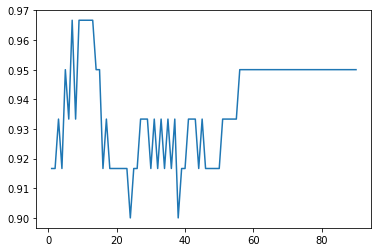

In [5]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0 #qui metto la miglire accuracy
best_k=1 #qui metto il migliore k
A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies for all past K value
for n_neighbors in np.arange(1,len(y_train)+1): #itero su tutti i valori di k da 1 alla lunghezza del training set +1 , perchè quando quando sono a len()+1 esco dal for
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    #Sotto sono i possibili parametri che possiamo mettere nel classificatore
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train) #fitting dei dati al classificatore
    index=n_neighbors-1 #usiamo il numero dei neighbours come grandezza dell'array degli score
    A[index]=clf_knn3.score(X_test, y_test) #store accuracy score in the matrix
    #Compare this score with actual best accuracy
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k neighbors="+str(n_neighbors))
    print("accuracy="+str(clf_knn3.score(X_test, y_test)))
    
print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

# In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting of the vote of the neighbours (uniform and with distance)

weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k n

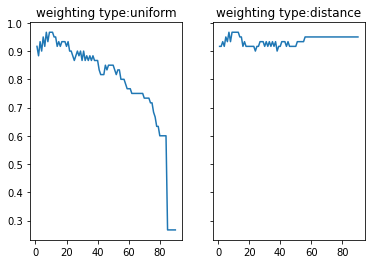

In [6]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


# In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting of the vote of the neighbours (uniform and with distance)


 weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k

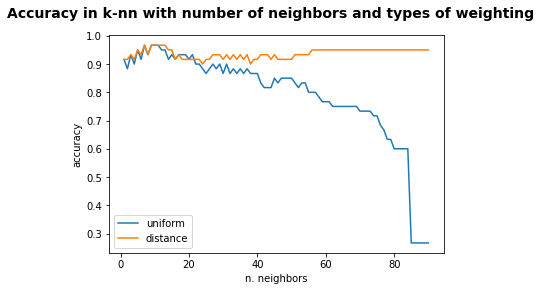

In [7]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


# Esercizio 1 Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica scegliendo due attributi tra i 4 disponibili.

Ho scelto sepal width e sepal lenght


Text(0, 0.5, 'sepal width (cm)')

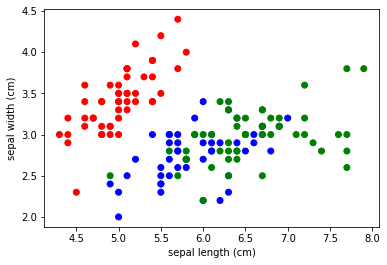

In [11]:
#prediction = clf_knn.predict(X_test)

#Imposto i colori da usare per ogni classe
colors = [0]*len(iris.data) # un array tutto di elementi a zero tanti quanti sono gli elementi di iris.data
for i in range(len(iris.data)):
    if iris.target[i]==0:
        colors[i]='r'
    elif iris.target[i]==1:
        colors[i]='b'
    else:
        colors[i]='g'
#plotto i punti del dataset
plt.scatter(iris.data[:,0], iris.data[:,1], c=colors) # basta cambiare lo 0 e 1 per cambiare gli attributi da plottare
plt.xlabel(iris.feature_names[0]) #sepal length (cm)
plt.ylabel(iris.feature_names[1]) #sepal width (cm)

#Esercizio 2  Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


[1.         1.         1.         0.94444444 0.94444444]


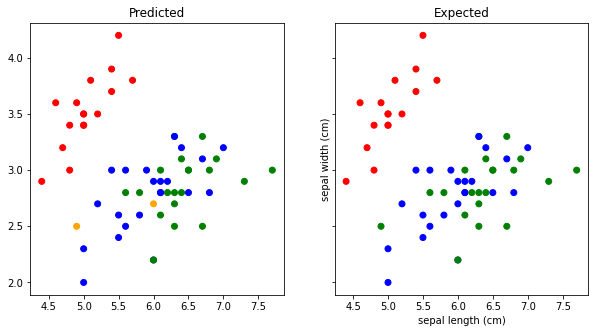

In [14]:
#doing prediction with the best values of neighbors
n_neighbors = 7
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn.fit(X_train, y_train)
prediction = clf_knn.predict(X_test)
scores = cross_val_score(clf_knn, X_train, y_train, cv=5,scoring='accuracy') # score will be the accuracy
print(scores)

colors2 = [0]*len(y_test) #faccio un array tutto di zeri quanto la lunghezza di y_test
for i in range(len(y_test)):
    if y_test[i]==0:
        colors2[i]='r'
    elif y_test[i]==1:
        colors2[i]='b'
    else:
        colors2[i]='g'
        
colors1 = [0]*len(prediction) #array di colori in base alla classe e correttezza della predizione
for i in range(len(prediction)):
    if prediction[i]==y_test[i] and prediction[i]==0: #se la predizione è uguale al target(prdizione giusta) allora assegno il colore
        colors1[i]='r'
    elif prediction[i]==y_test[i] and prediction[i]==1:
        colors1[i] = 'b'
    elif prediction[i]==y_test[i] and prediction[i]==2:
        colors1[i] = 'g'
    else:
        colors1[i]='orange' #orange è il colore assegnato alle predizioni sbagliate 
        
f, axarr = plt.subplots(1, 2, sharey=True,figsize=(10,5))
#metodo per creare figura con due grafici (subplot)
#plt.subplot( n* righe, n* colonne, condividere le proprietà tra asse x e y, size delle figure )
plt.xlabel(iris.feature_names[0]) # assegno le label sepal length (cm)
plt.ylabel(iris.feature_names[1]) # assegno le label sepal width (cm)


#predicted
axarr[0].set_title('Predicted') #setto il titolo del primo grafo
axarr[0].scatter(X_test[:,0], X_test[:,1], c=colors1) # inserisco i dati del primo grafo

#expected
axarr[1].set_title('Expected') #setto il titolo del secondo  grafo
axarr[1].scatter(X_test[:,0], X_test[:,1], c=colors2) # inserisco i dati del secondo  grafo

#Esercizio 3 In the following, extend the above exercize on k-nn using a kernel function K(x,y) for the distances computation, such that distance(x,y)=1-K(x,y). Use a Gaussian-like (or Radial Basis Function) kernel K(x,y)=exp(-gamma(x-y)^2), with gamma the inverse of the sigma squared variance, that must be tuned to the best value according to the accuracy reached by the k-nn, with k=7 (similarly as done with the previous example on tuning the parameter n_neightbors).



best s=0.6154545454545455
best accuracy=0.9666666666666667
[1.         1.         1.         0.94444444 0.94444444]


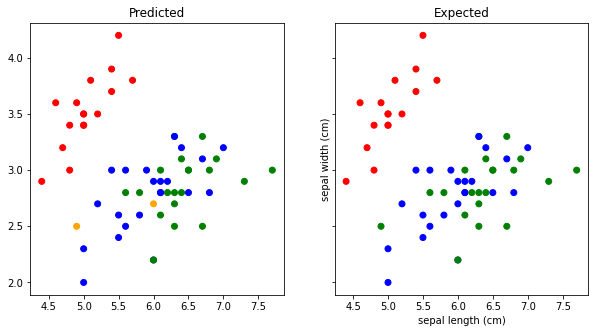

In [15]:
def gaussian(sigma):
    # dist array contenente le distanze euclidee tra ogni vicino ed il punto in esame
    def distance(dist):
        return np.exp(-(dist**2 / (2*(sigma**2))))
    return distance

best_sigma = 0
best_accuracy = 0
#Provo 100 valori diversi di sigma da 0,01 a 10 per la gaussiana e cerco il migliore
for s in np.linspace(0.01, 10, 100): # linespace restituisce un campionamento dello spazio da 0,01 a 10 in 100 parti
    clf = neighbors.KNeighborsClassifier(7, weights=gaussian(s)).fit(X_train, y_train)
    if best_accuracy<clf.score(X_test, y_test):
        best_accuracy=clf.score(X_test, y_test)
        best_sigma=s
    
print("\n")
print("best s="+str(best_sigma))
print("best accuracy="+str(best_accuracy))

#Istanzio il classificatori con i parametri best_sigma appena trovato
clf_g = neighbors.KNeighborsClassifier(7, weights=gaussian(best_sigma)).fit(X_train, y_train)
scores = cross_val_score(clf_knn, X_train, y_train, cv=5,scoring='accuracy') # score will be the accuracy
print(scores)

prediction = clf_g.predict(X_test)

colors1 = [0]*len(prediction)
for i in range(len(prediction)):
    if prediction[i]==y_test[i] and prediction[i]==0:
        colors1[i]='r'
    elif prediction[i]==y_test[i] and prediction[i]==1:
        colors1[i] = 'b'
    elif prediction[i]==y_test[i] and prediction[i]==2:
        colors1[i] = 'g'
    else:
        colors1[i]='orange'
        
f, axarr = plt.subplots(1, 2, sharey=True,figsize=(10,5))

plt.xlabel(iris.feature_names[0]) #sepal length (cm)
plt.ylabel(iris.feature_names[1]) #sepal width (cm)

#predicted
axarr[0].set_title('Predicted')
axarr[0].scatter(X_test[:,0], X_test[:,1], c=colors1)

#expected
axarr[1].set_title('Expected')
axarr[1].scatter(X_test[:,0], X_test[:,1], c=colors2)
